## ARIMA (Autoregressive integrated moving average)


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pathlib import Path

In [87]:
directory = Path.cwd().parent /'Files'/'Time_Series'
df = pd.read_csv(directory/'monthly-milk-production-pounds-p.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [88]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [89]:
df.drop(168,axis=0,inplace=True)

In [90]:
df.columns=['Month', 'Milk in pounds per cow']
df.tail()

,Month,Milk in pounds per cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [91]:
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [92]:
df.set_index('Month',inplace=True)
df.tail()

,Milk in pounds per cow
Month,
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0
1975-11-01,797.0
1975-12-01,843.0


In [93]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


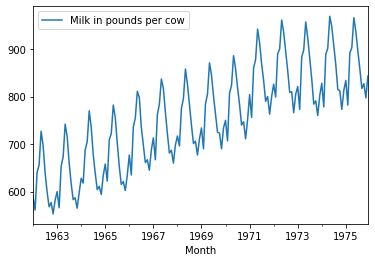

In [94]:
df.plot();

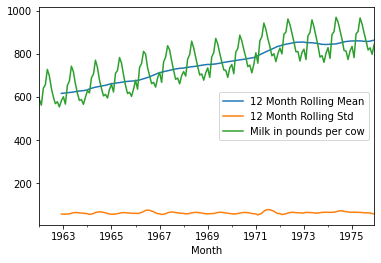

In [95]:
timeseries = df['Milk in pounds per cow']
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend();

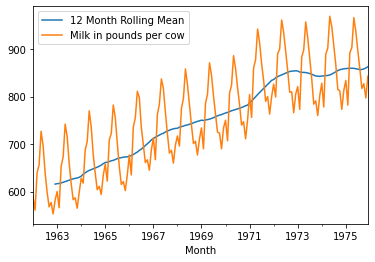

In [96]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend();

**Decomposition**

<Figure size 432x288 with 0 Axes>

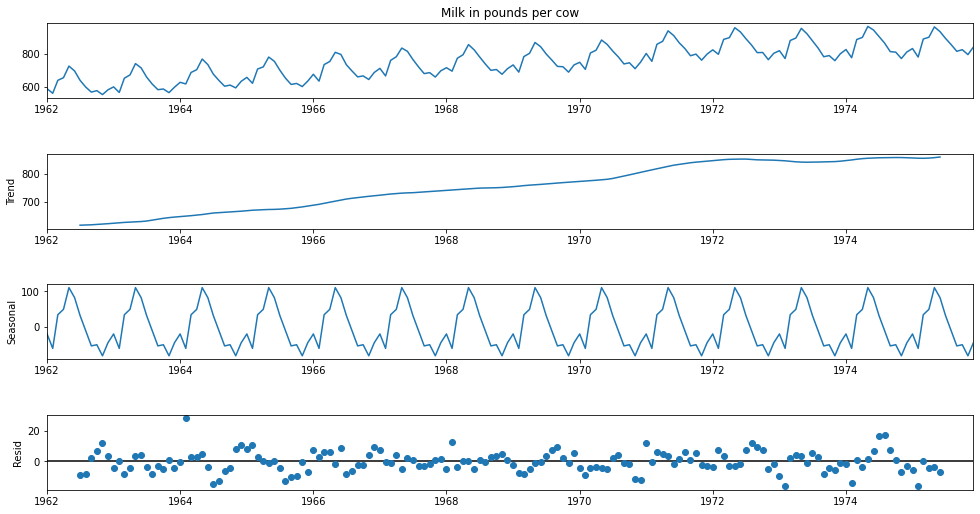

In [97]:
decomposition = seasonal_decompose(df['Milk in pounds per cow'], period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,8)

## Seasonality

In [98]:
from statsmodels.tsa.stattools import adfuller

In [99]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [100]:
result = adfuller(df['Milk in pounds per cow'])

In [101]:
print('Augmented Dickey-Fuller test (DAF):')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("Preuves solides contre l'hypothèse nulle, rejette l'hypothèse nulle. Les données n'ont pas de racine unitaire et sont stationnaires")
else:
    print("Faible preuve contre l'hypothèse nulle, la série temporelle a une racine unitaire, ce qui indique qu'elle est non stationnaire ")

Augmented Dickey-Fuller test (DAF):
ADF Test Statistic : -1.3038115874221345
p-value : 0.6274267086030293
#Lags Used : 13
Number of Observations Used : 154
Faible preuve contre l'hypothèse nulle, la série temporelle a une racine unitaire, ce qui indique qu'elle est non stationnaire 


In [102]:
def adf_check(time_series):
    """
    Passe une série temporelle, retourne le rapport ADF
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller test (DAF):')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Preuves solides contre l'hypothèse nulle, rejeter l'hypothèse nulle. Les données n'ont pas de racine unitaire et sont stationnaires")
    else:
        print("Faible preuve contre l'hypothèse nulle, la série temporelle a une racine unitaire, ce qui indique qu'elle est non stationnaire ")

In [103]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [104]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller test (DAF):
ADF Test Statistic : -3.0549955586530833
p-value : 0.030068004001784585
#Lags Used : 14
Number of Observations Used : 152
Preuves solides contre l'hypothèse nulle, rejeter l'hypothèse nulle. Les données n'ont pas de racine unitaire et sont stationnaires


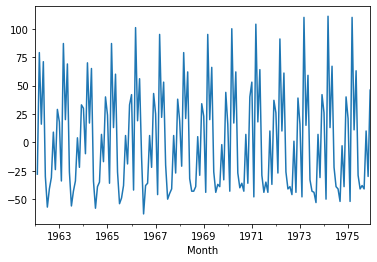

In [105]:
df['Milk First Difference'].plot();

In [106]:
df['Milk Second Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(1)

In [107]:
adf_check(df['Milk Second Difference'].dropna())

Augmented Dickey-Fuller test (DAF):
ADF Test Statistic : -14.327873645603294
p-value : 1.1126989332085062e-26
#Lags Used : 11
Number of Observations Used : 154
Preuves solides contre l'hypothèse nulle, rejeter l'hypothèse nulle. Les données n'ont pas de racine unitaire et sont stationnaires


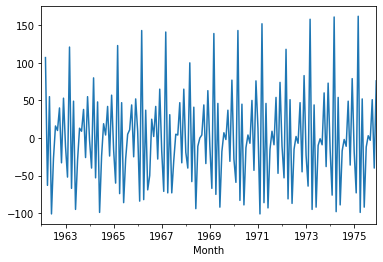

In [108]:
df['Milk Second Difference'].plot();

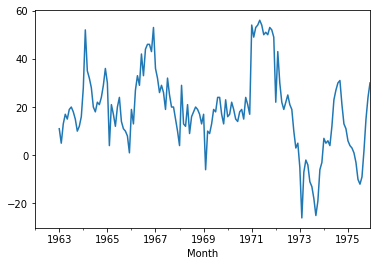

In [109]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)
df['Seasonal Difference'].plot();

In [110]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller test (DAF):
ADF Test Statistic : -2.3354193143594
p-value : 0.16079880527711288
#Lags Used : 12
Number of Observations Used : 143
Faible preuve contre l'hypothèse nulle, la série temporelle a une racine unitaire, ce qui indique qu'elle est non stationnaire 


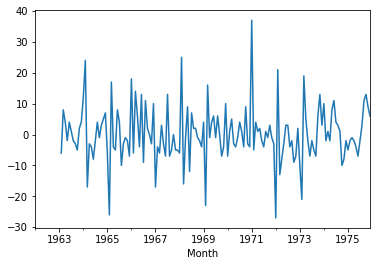

In [111]:
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
df['Seasonal First Difference'].plot();

In [112]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller test (DAF):
ADF Test Statistic : -5.03800227492198
p-value : 1.865423431878859e-05
#Lags Used : 11
Number of Observations Used : 143
Preuves solides contre l'hypothèse nulle, rejeter l'hypothèse nulle. Les données n'ont pas de racine unitaire et sont stationnaires


## Autocorrelation

In [113]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

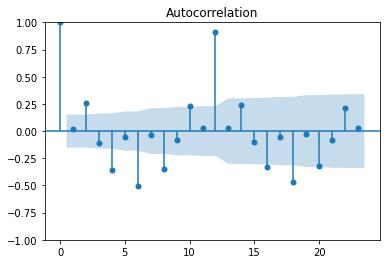

In [114]:
fig_first = plot_acf(df["Milk First Difference"].dropna());

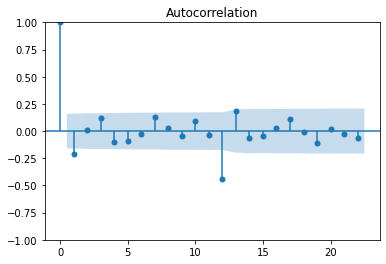

In [115]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna());

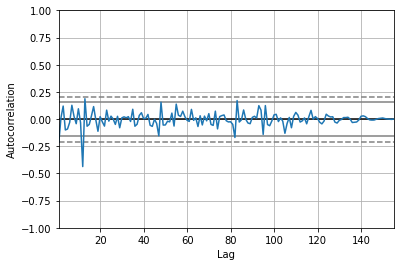

In [116]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna());

C:\Project\Financial_Analysis\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


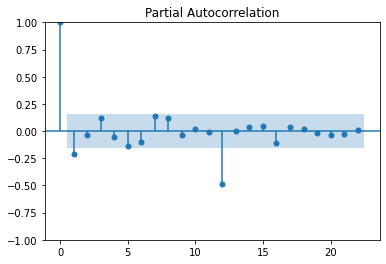

In [117]:
result = plot_pacf(df["Seasonal First Difference"].dropna());

## ACF and PACF

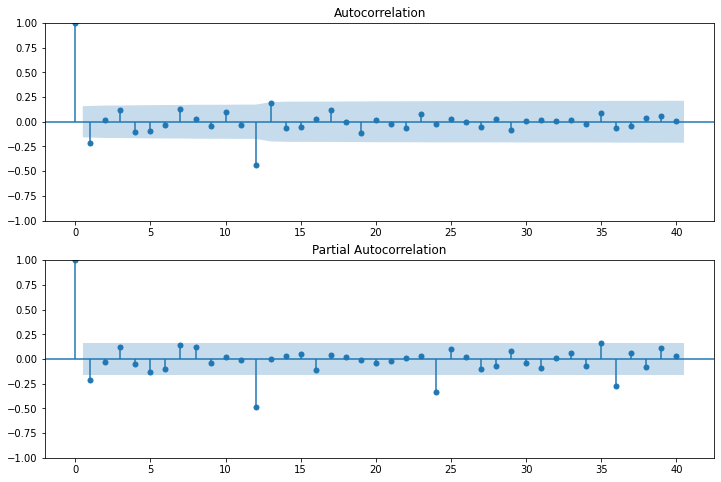

In [118]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2);

**With Seasonal ARIMA**

In [119]:
from statsmodels.tsa.arima_model import ARIMA

In [120]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(*args, **kwargs)
 |  
 |  ARIMA has been deprecated in favor of the new implementation
 |  
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |  
 |  Method resolution order:
 |      ARIMA
 |      ARMA
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from ARMA:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [121]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary());

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Mon, 15 Aug 2022   AIC                           1074.131
Time:                                      10:55:35   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

C:\Project\Financial_Analysis\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Project\Financial_Analysis\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


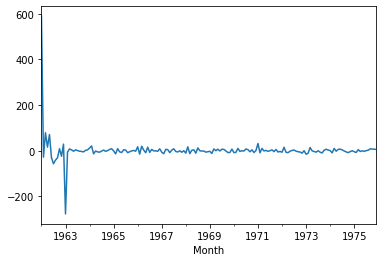

In [122]:
results.resid.plot();

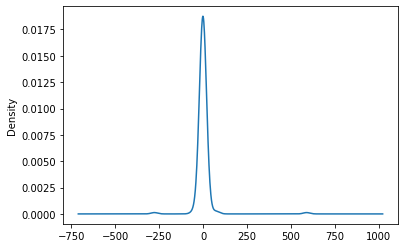

In [123]:
results.resid.plot(kind='kde');

## Future Value Prediction

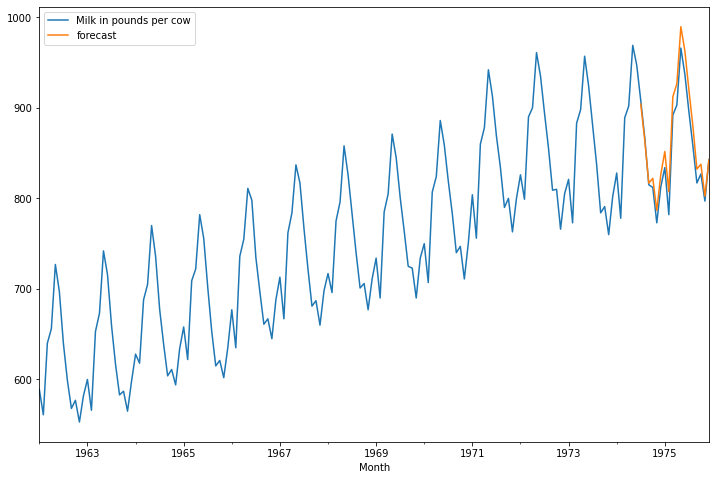

In [124]:
df['forecast'] = results.predict(start = 150, end= 168, dynamic= True)
df[['Milk in pounds per cow','forecast']].plot(figsize=(12,8));

**Forcast**

In [125]:
df.tail()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,879.668974
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,832.328554
1975-10-01,827.0,10.0,51.0,15.0,13.0,837.722249
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,802.452736
1975-12-01,843.0,46.0,76.0,30.0,6.0,842.499870


In [126]:
from pandas.tseries.offsets import DateOffset

In [127]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24) ]

In [128]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [129]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [130]:
future_df = pd.concat([df,future_dates_df])

In [131]:
future_df.head()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [132]:
future_df.tail()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

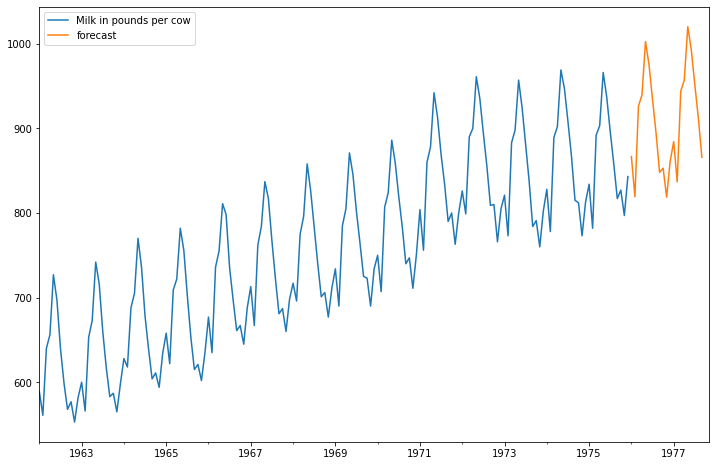

In [133]:
future_df['forecast'] = results.predict(start = 168, end = 188, dynamic= True)
future_df[['Milk in pounds per cow', 'forecast']].plot(figsize=(12, 8))